<a href="https://colab.research.google.com/github/ahnnoah/study/blob/main/Colab/2022/1_%EC%A7%91%EA%B0%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DNN으로 집값 예측하기
2022년 1월 5일
임성규

In [ ]:
# 1번 셀

print('hello world')

# 패키지 수입
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from time import time
from keras.models import Sequential
from keras.layers import Dense

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

hello world


In [ ]:
# 2번 셀

# 하이퍼 파라미터 지정
MY_HIDDEN = 1000         # 은닉층 뉴런 수
MY_EPOCH = 10            # 반복 학습 수

# 판다스 테이블 출력 시 생략하는 컬럼을 방지하는 옵션
#pd.set_option('display.max_columns', None)


In [ ]:
# 3번 셀

# 데이터 파일 읽기
data = pd.read_csv('/content/drive/MyDrive/my-data/housing.csv')

# 데이터 샘플 출력
print(data.head(5))
print(data.tail(5))

# 데이터 통계 출력
print(data.describe())


      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD  TAX  PTRATIO  LSTAT  MEDV
0  0.00632  18.0   2.31     0  0.538  ...    1  296     15.3   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...    2  242     17.8   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...    2  242     17.8   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...    3  222     18.7   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...    3  222     18.7   5.33  36.2

[5 rows x 13 columns]
        CRIM   ZN  INDUS  CHAS    NOX  ...  RAD  TAX  PTRATIO  LSTAT  MEDV
501  0.06263  0.0  11.93     0  0.573  ...    1  273     21.0   9.67  22.4
502  0.04527  0.0  11.93     0  0.573  ...    1  273     21.0   9.08  20.6
503  0.06076  0.0  11.93     0  0.573  ...    1  273     21.0   5.64  23.9
504  0.10959  0.0  11.93     0  0.573  ...    1  273     21.0   6.48  22.0
505  0.04741  0.0  11.93     0  0.573  ...    1  273     21.0   7.88  11.9

[5 rows x 13 columns]
             CRIM          ZN       INDUS  ...     PTRATIO  

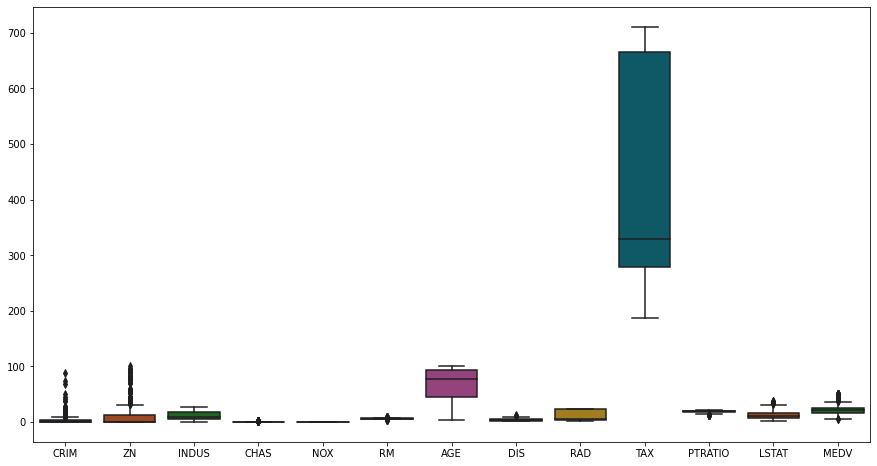

In [ ]:
# 4번 셀

# 상자 그림
plt.figure(figsize=(15, 8))
sns.boxplot(data=data, palette='dark')


전환 전: <class 'numpy.ndarray'>
전환 후: <class 'pandas.core.frame.DataFrame'>
         0         1         2   ...        10        11        12
0 -0.419782  0.284830 -1.287909  ... -1.459000 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381  ... -0.303094 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381  ... -0.303094 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878  ...  0.113032 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878  ...  0.113032 -1.026501  1.487503

[5 rows x 13 columns]
                 0             1   ...            11            12
count  5.060000e+02  5.060000e+02  ...  5.060000e+02  5.060000e+02
mean  -8.688702e-17  3.306534e-16  ... -1.595123e-16 -4.247810e-16
std    1.000990e+00  1.000990e+00  ...  1.000990e+00  1.000990e+00
min   -4.197819e-01 -4.877224e-01  ... -1.531127e+00 -1.908226e+00
25%   -4.109696e-01 -4.877224e-01  ... -7.994200e-01 -5.994557e-01
50%   -3.906665e-01 -4.877224e-01  ... -1.812536e-01 -1.450593e-01
75%    7.396560e-03  4.877224e-0

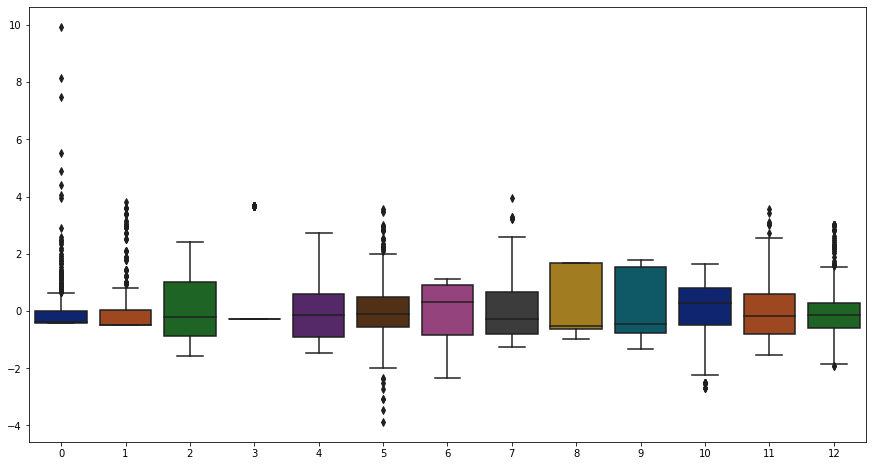

In [ ]:
# 5번 셀

# 데이터 정규화 
# z-점수 정규화는 그 결과를 numpy로 전환함
scaler = StandardScaler()
z_data = scaler.fit_transform(data)

# z-데이터를 numpy에서 pandas로 전환
print('전환 전:', type(z_data))
z_data = pd.DataFrame(z_data)
print('전환 후:', type(z_data))
print(z_data.head(5))

# z-점수 정규화 후 통계 출력
print(z_data.describe())

# 상자 그림
plt.figure(figsize=(15, 8))
sns.boxplot(data=z_data, palette='dark')

In [ ]:
# 6번 셀

# 데이터을 입력과 출력으로 분할
X_data = z_data.drop(12, axis=1)
#print(X_data)
Y_data = z_data[12]
#print(Y_data)

# 데이터를 학습용과 평가용으로 분할
# 순서 중요
X_train, X_test, Y_train, Y_test = train_test_split(X_data,
                                                    Y_data,
                                                    train_size=0.7)

# 데이터 모양 출력
print('학습용 입력 모양:', X_train.shape)
print('평가용 입력 모양:', X_test.shape)
print('학습용 출력 모양:', Y_train.shape)
print('평가용 출력 모양:', Y_test.shape)



학습용 입력 모양: (354, 12)
평가용 입력 모양: (152, 12)
학습용 출력 모양: (354,)
평가용 출력 모양: (152,)


In [ ]:
# 7번 셀

# 인공 신경망 구현
# Sequential 방식: 입력부터 출력으로 한층 한층 추가하는 방식
model = Sequential()

# 입력층 + 은닉층1 동시에 추가
model.add(Dense(units=MY_HIDDEN,
                input_dim=12,
                activation='relu'))

# 은닉층 2 추가
model.add(Dense(units=MY_HIDDEN,
                activation='relu'))

# 출력층 추가
model.add(Dense(units=1))

# DNN (deep neural network) 요약
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              13000     
                                                                 
 dense_1 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_2 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 1,015,001
Trainable params: 1,015,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 8번 셀

# DNN 학습
# 학습 환경 설정
model.compile(optimizer='sgd',
              loss='mse')

# 학습 진행
print('학습 시작')
begin = time()

model.fit(X_train,
          Y_train,
          epochs=MY_EPOCH,
          verbose=1)

end = time()
print('총 학습 시간:', end - begin)

학습 시작
Epoch 1/10
12/12 [==============================] - 1s 14ms/step - loss: 0.7191
Epoch 2/10
12/12 [==============================] - 0s 13ms/step - loss: 0.4234
Epoch 3/10
12/12 [==============================] - 0s 13ms/step - loss: 0.3111
Epoch 4/10
12/12 [==============================] - 0s 14ms/step - loss: 0.2504
Epoch 5/10
12/12 [==============================] - 0s 13ms/step - loss: 0.2117
Epoch 6/10
12/12 [==============================] - 0s 13ms/step - loss: 0.1733
Epoch 7/10
12/12 [==============================] - 0s 13ms/step - loss: 0.1637
Epoch 8/10
12/12 [==============================] - 0s 13ms/step - loss: 0.1482
Epoch 9/10
12/12 [==============================] - 0s 13ms/step - loss: 0.1414
Epoch 10/10
12/12 [==============================] - 0s 14ms/step - loss: 0.1331
총 학습 시간: 2.207249641418457


In [ ]:
# 9번 셀

# DNN 평가
score = model.evaluate(X_test,
                       Y_test)

print('최종 MSE 손실값:', score)


5/5 [==============================] - 0s 8ms/step - loss: 0.3119
최종 MSE 손실값: 0.3118773400783539


In [ ]:
# 10번 셀

# DNN 예측
pred = model.predict(X_test)
print('첫번째 집값 예측 (Z-점수):', pred[0])
print('첫번째 집값 정답 (Z-점수):', Y_test.iloc[0])


첫번째 집값 예측 (Z-점수): [1.6758912]
첫번째 집값 정답 (Z-점수): 2.3364352090873783
